In [1]:
from models import *
from DScontrol import *
import matplotlib.pyplot as plt
import warnings

In [39]:
edge = EdgeBlur(15, 5, 15, 1, 5)
gabor = FourierGabor(5, 5, 5)

predict = {
    #'EdgeBlur':[],
    #'EdgeBlur_error':[],
    'FourierGabor':[],
    'FourierGabor_error':[]
}
total = len(DS)
for i, filename in enumerate(DS.filename):
    image = get(filename)
    '''with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        area, error = edge.predict(image)
        predict['EdgeBlur'].append(area)
        predict['EdgeBlur_error'].append(error)'''
    area, error = gabor.predict(image)
    predict['FourierGabor'].append(area)
    predict['FourierGabor_error'].append(error)

    print(f'{i+1}/{total}|{(i/total*100):.2f}%', end='\r')

In [40]:
ds = pd.concat([DS, pd.DataFrame(predict)], axis=1)
ds

,filename,area,FourierGabor,FourierGabor_error
0,0.jpg,100.473,105.027969,0.227643
1,1.jpg,127.880,135.908127,0.023820
2,2.jpg,161.820,171.705444,0.062668
3,3.jpg,190.003,181.720215,0.463668
4,4.jpg,22.713,21.627853,0.009092
...,...,...,...,...
350,350.jpg,98.599,100.750671,0.056719
351,351.jpg,98.599,100.099060,0.122426
352,352.jpg,98.599,100.805054,0.090786
353,353.jpg,98.599,100.429565,0.113918


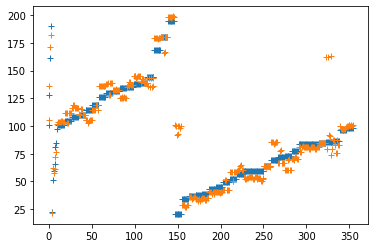

In [42]:
plt.plot(ds.area, '+')
plt.plot(ds.FourierGabor, '+')
#plt.plot(ds.EdgeBlur, '+')
plt.show()

In [33]:
ds['disp'] = ds.area - ds.FourierGabor

In [34]:
(np.abs(ds.disp)/ds.area*100).describe()

count    355.000000
mean      20.458294
std       56.856990
min        0.000822
25%        4.856307
50%       11.498254
75%       16.079480
max      397.087664
dtype: float64

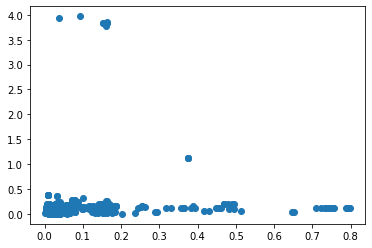

In [38]:
plt.plot(ds.FourierGabor_error, np.abs(ds.disp)/ds.area, 'o')